In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    

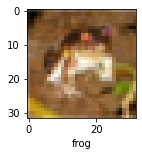

In [10]:
plot_sample(X_train, y_train, 0)

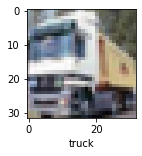

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.8117 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6233 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.5410 - accuracy: 0.4575
Epoch 4/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4818 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4336 - accuracy: 0.4970


In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 3s 8ms/step


In [16]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.63      0.57      1000
           1       0.73      0.37      0.49      1000
           2       0.46      0.11      0.18      1000
           3       0.44      0.13      0.20      1000
           4       0.31      0.64      0.42      1000
           5       0.36      0.48      0.41      1000
           6       0.59      0.38      0.47      1000
           7       0.49      0.60      0.54      1000
           8       0.72      0.51      0.60      1000
           9       0.43      0.73      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.44     10000
weighted avg       0.50      0.46      0.44     10000



In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4729 - accuracy: 0.4703
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1183 - accuracy: 0.6083
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9802 - accuracy: 0.6583
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8992 - accuracy: 0.6892
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8353 - accuracy: 0.7115
Epoch 6/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7781 - accuracy: 0.7290
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7291 - accuracy: 0.7458
Epoch 8/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6796 - accuracy: 0.7623
Epoch 9/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6419 - accuracy: 0.7764
Epoch 10/10
1563/1563 [==============================] - 31s 20m

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.9753 - accuracy: 0.6848


[0.9753468632698059, 0.6848000288009644]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[2.57260725e-03, 1.20886264e-03, 1.28721795e-03, 8.42931628e-01,
        3.99101991e-04, 1.17583655e-01, 4.72316286e-03, 1.86787856e-05,
        2.86897589e-02, 5.85338217e-04],
       [3.28349066e-03, 3.06088403e-02, 1.53434976e-05, 5.06595192e-08,
        1.22256188e-06, 6.13997964e-09, 2.96563087e-07, 6.16853901e-09,
        9.65652525e-01, 4.38191375e-04],
       [4.86706123e-02, 1.25974044e-01, 1.56903155e-02, 6.01534615e-04,
        8.23123410e-05, 3.60565929e-04, 6.61985716e-04, 1.88825303e-04,
        8.04951966e-01, 2.81792902e-03],
       [6.98961437e-01, 7.80484900e-02, 4.38384339e-02, 1.34643877e-03,
        7.68780941e-03, 9.02364991e-05, 1.43177051e-03, 1.29292821e-04,
        1.68377310e-01, 8.88396244e-05],
       [1.18301998e-07, 1.49794471e-06, 1.26228528e-02, 8.82024691e-03,
        3.94167490e-02, 1.17788103e-03, 9.37959611e-01, 3.20067983e-07,
        7.04649608e-07, 6.40538929e-08]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

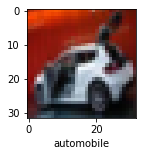

In [27]:
plot_sample(X_test, y_test,6)

In [28]:
classes[y_classes[6]]

'automobile'